# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
dataset = pd.read_csv("/Users/jayparekh/Documents/machine_learning_dataScience/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/Ads_CTR_Optimisation.csv")
dataset = dataset.iloc[ : , : ].values

# Implementing Upper Confidence Bound Algorithm

In [11]:
import math

N = 10000
d = 10
selectedAds = []
rewardOfAds = [0] * d
numberOfSelections = [0] * d

for n in range(0, N) :
    ad = 0
    maxUCB = 0
    for i in range(0, d) :
        if (numberOfSelections[i] > 0) :
            averageReward = rewardOfAds[i] / numberOfSelections[i]
            deltaI = math.sqrt(3 / 2 * math.log(n + 1) / numberOfSelections[i])
            UCB = averageReward + deltaI
            
        else :
            UCB = 1e400
            
        if(UCB > maxUCB) :
            maxUCB = UCB
            ad = i
    selectedAds.append(ad)
    numberOfSelections[ad] = numberOfSelections[ad] + 1
    rewardOfAds[ad] = rewardOfAds[ad] + dataset[n, ad]
    

# Visualising The Results

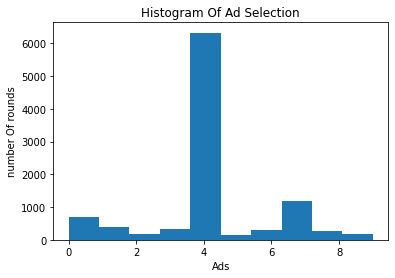

In [12]:
plt.hist(selectedAds)
plt.title('Histogram Of Ad Selection')
plt.xlabel("Ads")
plt.ylabel("number Of rounds")
plt.show()